## 偏態分佈

<img src="skweness.png" alt="skweness" style="width: 600px">

### 在機器學習中，處理偏態資料能給結果帶來什麼好處?
主要有兩點
1. 改善模型
有些模型對於極端值非常敏感，通過減少偏態，可以使模型更穩定地預測。
2. 某些模型評估指標（如均方誤差）對於偏態資料敏感，可能導致模型在偏態資料上表現較差

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, yeojohnson, boxcox, skew, kurtosis

# 忽略FutureWarning警告
warnings.filterwarnings("ignore", category=FutureWarning)

第一步是檢查資料欄位是離散還是連續型

1.欄位資料若無法轉成float或int，則為離散型資料，但是float或int不一定為連續型資料

    ex1 : 身分證字號"H123456789"，無法轉成數字類，則為離散型

    ex2 : 每個人的幸運數字，雖然可以轉成數字類，但實則為離散型



2.唯一值的數量相對較少的可能為離散型，唯一值的數量相對較多的可能為連續型

    ex1 : 血型只有4種，欄位的唯一值少，為離散型

    ex2 : BMI的測量結果有很多種，欄位的唯一值多，為連續型

In [13]:
# 美國白酒品質資料
wine_quality = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/winequality-white.csv')

In [14]:
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


畫出BMI的直方圖來查看資料分佈

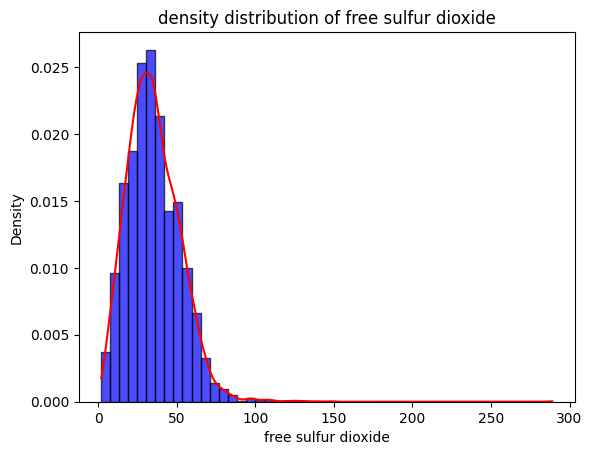

In [37]:
sulfur_data = wine_quality['free sulfur dioxide']
plt.hist(sulfur_data, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')

#計算機率密度函數
kde = gaussian_kde(sulfur_data)
x_vals = np.linspace(sulfur_data.min(), sulfur_data.max(), 1000)
kde_vals = kde(x_vals)
plt.plot(x_vals, kde_vals, color='red', label='KDE')

plt.xlabel('free sulfur dioxide')
plt.ylabel('Density')
plt.title('density distribution of free sulfur dioxide')

plt.show()

In [38]:
#打包成函式
def plot_histogram_with_kde(data, bins=50, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(10, 6))
    
    # Create histogram
    plt.hist(data, bins=bins, density=True, alpha=0.7, color='blue', edgecolor='black')
    
    # Calculate KDE
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 1000)
    kde_vals = kde(x_vals)
    
    # Plot KDE
    plt.plot(x_vals, kde_vals, color='red', label='KDE')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    

### 直方圖陷阱
直方圖是用來畫出連續變數分佈的，但是不同的bin會使得圖形呈現不同樣貌，而做出不同判斷，要怎麼找出最佳bin，我不知道^_^

也許根本就不存在最好的bin，所以通常也會利用其他圖形來做判斷

### 箱形圖

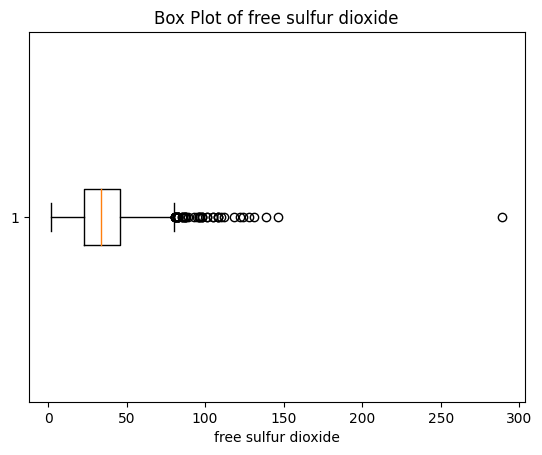

In [9]:
import matplotlib.pyplot as plt

sulfur_data = wine_quality['free sulfur dioxide']

plt.boxplot(sulfur_data, vert=False)

plt.xlabel('free sulfur dioxide')
plt.title('Box Plot of free sulfur dioxide')

plt.show()

<img src="outliers.png" alt="outliers" style="width: 600px">

### 可以直接刪掉離異值？
離異值並不是都沒有意義，例如在美國富豪們的資產屬於前1%的離群值，但是他們佔有了全美30%以上的資產，若是直接刪除會出問題的
下面有幾種資料科學家常用的處理方法

1.直接刪除:確認過離群值對於資料集來說並無存在特殊意義，直接將該值刪除。

2.視為遺失值:將異常值視為遺失值，後續利用處理缺失值的方法進行。

3.用平均值調整:利用前後兩個資料點的平均值修正該異常值。

4.不處理:忽視異常值，直接對資料集進行後續分析。

總結來說，異常值的處理要根據實際的情況作考慮，有一些模型對於異常值不太敏感，即使資料集存在異常值也不影響模型效果。但是，像是邏輯斯回歸(Logistic regression) 這類模型對於異常值非常敏感，若是不處理可能會產生過度擬合( overfitting )的結果。

來源: 
https://www.dcard.tw/f/softwareengineer/p/236102311?__cf_chl_tk=dNGgSUP32yydm77XFL69soZ9xMLw1FGZ3vK9SB80R_g-1691749119-0-gaNycGzNDDs

### 偏態檢查and處理

＊ 每種資料不盡相同，這邊只是取大概，並非絕對

無偏度（正態分佈）：當資料的偏度接近零，或者資料分佈相對均衡，模型可能不太受偏態影響，無需額外處理。

輕微偏度：偏度介於-0.5和0.5之間，資料分佈輕微不均衡。在這種情況下，可以考慮應用一些較輕量的處理方法。

中度偏度：偏度介於-1和-0.5，或者0.5和1之間，資料分佈有明顯的不均衡。

嚴重偏度：偏度小於-1或大於1，資料分佈非常不均衡。

In [10]:
sulfur_data = wine_quality['free sulfur dioxide']

skewness = round(sulfur_data.skew(), 2)
kurtosis = round(sulfur_data.kurt(), 2)
print("偏度為:", skewness)
print("峰度為:", kurtosis)

偏度為: 1.41
峰度為: 11.47


## 修正資料偏態的方法


### 1. 平方根轉換
對原始資料的每個數值取平方根，使其更接近正態分佈，減少極端值的影響。

注意: 資料不能是負數

偏度(Skewness): 0.05, 峰度(Kurtosis): 0.84


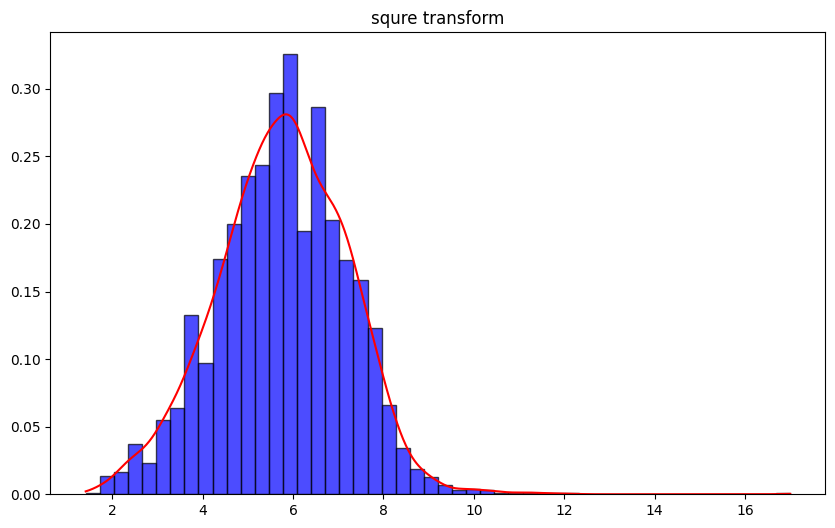

In [40]:
squre_sulfur_data = sulfur_data**(1/2)
# skewness 與 kurtosis
skewness = round(squre_sulfur_data.skew(), 2)
kurtosis = round(squre_sulfur_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
plot_histogram_with_kde(squre_sulfur_data, title='squre transform', xlabel='', ylabel='')
plt.show()

### 2. 對數轉換
對原始資料的每個數值取log，使其更接近正態分佈，減少極端值的影響。

注意: 資料不能是負數或0

偏度(Skewness): -0.94, 峰度(Kurtosis): 1.49


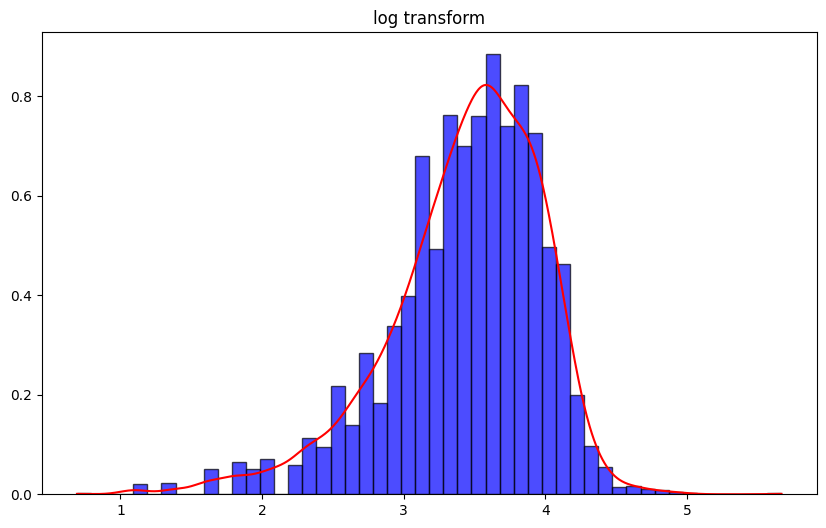

In [42]:
log_sulfur_data = np.log(sulfur_data)
# skewness 與 kurtosis
skewness = round(log_sulfur_data.skew(), 2)
kurtosis = round(log_sulfur_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
plot_histogram_with_kde(log_sulfur_data, title='log transform', xlabel='', ylabel='')
plt.show()

### 3.立方根轉換

對原始資料的每個數值取立方根，使其更接近正態分佈，減少極端值的影響。

偏度(Skewness): -0.27, 峰度(Kurtosis): 0.51


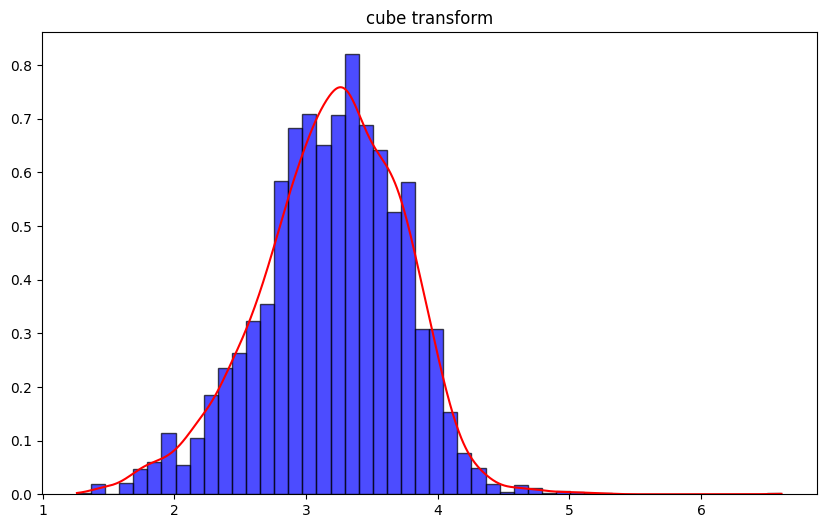

In [44]:
cube_sulfur_data = sulfur_data**(1/3)
# skewness 與 kurtosis
skewness = round(cube_sulfur_data.skew(), 2)
kurtosis = round(cube_sulfur_data.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
plot_histogram_with_kde(cube_sulfur_data, title='cube transform', xlabel='', ylabel='')
plt.show()

### 4.Box-Cox轉換

<img src="box-cox.png" alt="box-cox" style="width: 300px">

p.s 數值不能為0或複數

偏度: 0.030897531787331907
峰度: 0.8019291935875161
best lambda:0.490575


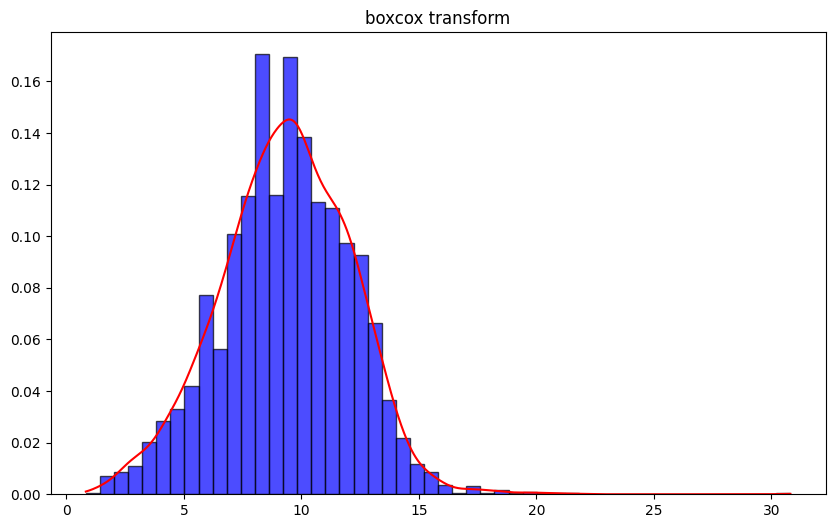

In [50]:
boxcox_sulfur_data, lambdaValue =boxcox(sulfur_data)

print('偏度:', skew(boxcox_sulfur_data))
print('峰度:', kurtosis(boxcox_sulfur_data))

print('best lambda:', lambdaValue)

plot_histogram_with_kde(boxcox_sulfur_data, title='boxcox transform', xlabel='', ylabel='')
plt.show()

### 5.Yeo-Johnson

<img src="yeo-johnson.webp" alt="yeo-johnson" style="width: 400px">

偏度: 0.026986694719566814
峰度: 0.7401190604929608
best lambda: 0.4696767794252274


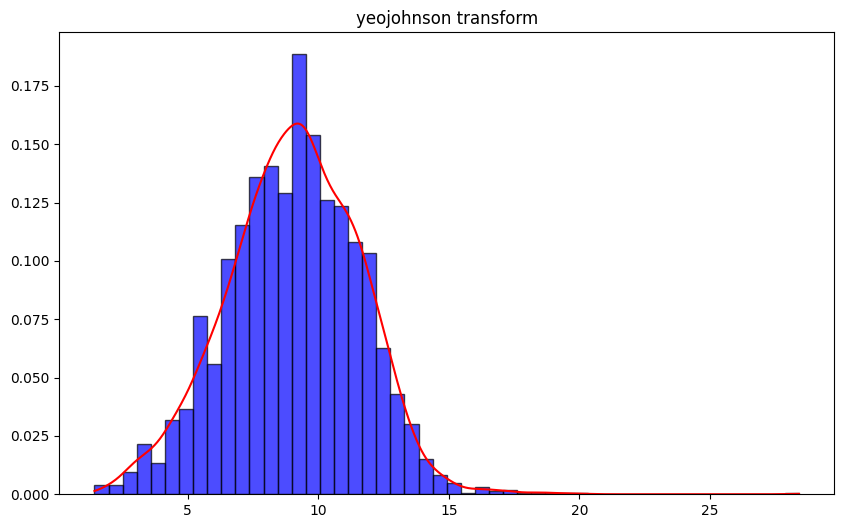

In [51]:
yeojohnson_sulfur_data, lambdaValue =yeojohnson(sulfur_data)

print('偏度:', skew(yeojohnson_sulfur_data))
print('峰度:', kurtosis(yeojohnson_sulfur_data))

print('best lambda:', lambdaValue)

plot_histogram_with_kde(yeojohnson_sulfur_data, title='yeojohnson transform', xlabel='', ylabel='')
plt.show()

6.去除離異值

簡單粗暴，但效果不一定好

In [54]:
# 將所有特徵超出1.5倍IQR的概念將這些Outlier先去掉，避免對Model造成影響。
print ("Shape Of The Before Ouliers: ",sulfur_data.shape)

n=1.5
#IQR = Q3-Q1
IQR = np.percentile(sulfur_data,75) - np.percentile(sulfur_data,25)
# outlier = Q3 + n*IQR 
no_outliers_data=sulfur_data[sulfur_data < np.percentile(sulfur_data,75)+n*IQR]
# outlier = Q1 - n*IQR 
no_outliers=no_outliers_data[sulfur_data > np.percentile(sulfur_data,25)-n*IQR]
print ("Shape Of The After Ouliers: ", no_outliers_data.shape)

Shape Of The Before Ouliers:  (4898,)
Shape Of The After Ouliers:  (4848,)


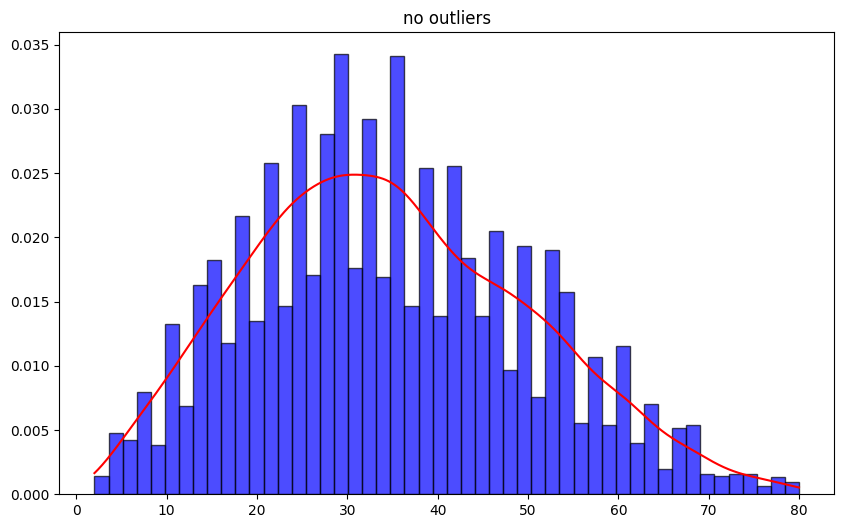

In [56]:
plot_histogram_with_kde(no_outliers_data, title='no outliers', xlabel='', ylabel='')
plt.show()